<a href="https://colab.research.google.com/github/Sompote/COV_pile/blob/main/pso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install pyswarms

     |████████████████████████████████| 104 kB 8.2 MB/s 


In [78]:
#PSO

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from keras.layers import Activation, Dense,Flatten,LSTM,Dropout, GRU
import warnings
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use("fivethirtyeight")

df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/demo_pso.xlsx')

#ks = pd.concat([df, df2,df3]).reset_index(drop=True)

ks=pd.DataFrame()



In [5]:
df

,es,ev,q,p
0,0.1,0.016667,10,3.333333
1,0.2,0.033333,20,6.666667
2,0.3,0.050000,30,10.000000
3,0.4,0.066667,40,13.333333
4,0.5,0.083333,50,16.666667
5,0.6,0.100000,60,20.000000
6,0.7,0.116667,70,23.333333
7,0.8,0.133333,80,26.666667
8,0.9,0.150000,90,30.000000
9,1.0,0.166667,100,33.333333


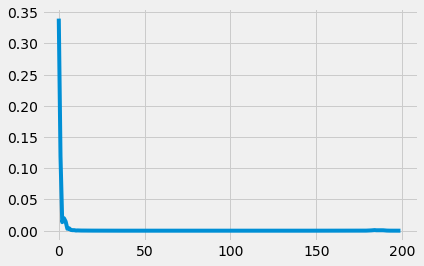

In [104]:
def scaler(xtrain1,y_train1):
  #scaler
  scaler_x = MinMaxScaler(feature_range=(-1,1))
  scaler_y = MinMaxScaler(feature_range=(-1,1))
  train_data_x = scaler_x.fit_transform(xtrain1)
  train_data_y=scaler_y.fit_transform(y_train1)
  return train_data_x, train_data_y, scaler_x, scaler_y

#Build the DL model
def model_fit(x_train,y_train):
  model_test = Sequential()
  model_test.add(Dense(50, activation="relu",input_dim=x_train.shape[1]))
  model_test.add(Dense(50))
  model_test.add(Dense(50))
  model_test.add(Dense(50))

  model_test.add(Dense(y_train.shape[1]))
  # Compile the model
  model_test.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mape'])
  history = model_test.fit(x_train, y_train, batch_size=3, epochs=200, verbose=0)
  #scores = model_dll.evaluate(x_test, y_test, verbose=0)
  plt.plot(history.history['loss'])
  return model_test

def predict_value(model,scaler_x,scaler_y,input):
#prediciton 
  input=[input]
  input=np.reshape(input,(1,1))
  input_scale=scaler_x.transform(input)
  predict = model.predict([input_scale])
  pre_nonscale=scaler_y.inverse_transform(predict)
  return pre_nonscale

ks=df
yi=ks.drop(['es'], axis=1).to_numpy()
  #yi=ks[['qn']].copy()
xi=ks[['es']].copy().to_numpy()
x_train, y_train, scaler_x, scaler_y =scaler(xi,yi)
model_test=model_fit(x_train,y_train)
predict_new=predict_value(model_test,scaler_x,scaler_y,0.2)

In [105]:
predict

array([[ 0.03163256, 20.286875  ,  7.30882   ]], dtype=float32)

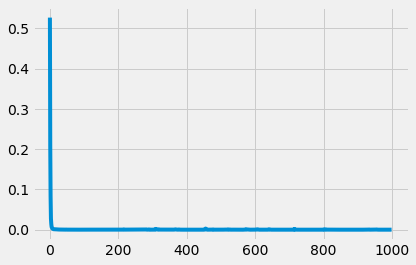

In [181]:

df2=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/con_model.xlsx')

#ks = pd.concat([df, df2,df3]).reset_index(drop=True)

ks2=pd.DataFrame()
def scaler(xtrain1,y_train1):
  #scaler
  scaler_x = MinMaxScaler(feature_range=(-1,1))
  scaler_y = MinMaxScaler(feature_range=(-1,1))
  train_data_x = scaler_x.fit_transform(xtrain1)
  train_data_y=scaler_y.fit_transform(y_train1)
  return train_data_x, train_data_y, scaler_x, scaler_y

#Build the DL model
def model_fit(x_train,y_train):
  model_test = Sequential()
  model_test.add(Dense(50, activation="relu",input_dim=x_train.shape[1]))
  model_test.add(Dense(50))
  
  model_test.add(Dense(y_train.shape[1]))
  # Compile the model
  model_test.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mape'])
  history = model_test.fit(x_train, y_train, batch_size=3, epochs=1000, verbose=0)
  #scores = model_dll.evaluate(x_test, y_test, verbose=0)
  plt.plot(history.history['loss'])
  return model_test

def predict_value_con(model,scaler_x,scaler_y,K,G,es):
#prediciton 
  input=np.array([K,G,es])
  input=np.reshape(input,(1,3))
  input_scale=scaler_x.transform(input)
  predict = model.predict([input_scale])
  pre_nonscale=scaler_y.inverse_transform(predict)
  return pre_nonscale

ks=df2
yi=ks.drop(['es','K','G'], axis=1).to_numpy()
  #yi=ks[['qn']].copy()
xi=ks[['K','G','es']].copy().to_numpy()
x_train, y_train, scaler_xcon, scaler_ycon =scaler(xi,yi)
model_con=model_fit(x_train,y_train)
predict_ini=np.array([30000,20000,0.2])
predict=predict_value_con(model_con,scaler_xcon,scaler_ycon,30000,20000,0.2)

In [107]:
df2

,K,G,es,ev,q,p
0,30000,20000,0.1,0.022222,20.0,6.666667
1,30000,20000,0.2,0.044444,40.0,13.333333
2,30000,20000,0.3,0.066667,60.0,20.000000
3,30000,20000,0.4,0.088889,80.0,26.666667
4,30000,20000,0.5,0.111111,100.0,33.333333
5,30000,20000,0.6,0.133333,120.0,40.000000
6,30000,20000,0.7,0.155556,140.0,46.666667
7,30000,20000,0.8,0.177778,160.0,53.333333
8,30000,20000,0.9,0.200000,180.0,60.000000
9,30000,20000,1.0,0.222222,200.0,66.666667


In [82]:
predict_ini=np.array([30000,20000,0.2])
predict=predict_value(model_con,scaler_x,scaler_y,predict_ini)
predict

array([[ 0.07126167, 39.835518  , 13.35872   ]], dtype=float32)

In [198]:
#-----------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Simple Particle Swarm Optimization (PSO) with Python
#   July, 2016
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def func1(x):
    total=0
    '''for i in range(len(x)):
        total+=x[i]**2'''
    total=predict_value_con(model_con,scaler_xcon,scaler_ycon,30000,20000,x[0])[0,0]

    return total

#--- MAIN ---------------------------------------------------------------------+

class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print('FINAL:')
        print('parameter:',pos_best_g)
        print('error:',err_best_g)


In [204]:
def fc(x):
  er=np.array([])
  for es in np.arange(0.1,2,0.5):
    predict_ini0=np.array([es],dtype=object)
    predict_ini_1=np.array([x[0],x[1],es],dtype=object)
    #fi=predict_value_con(model_con,scaler_xcon,scaler_ycon,x[0],x[1],es)[0,0]
    fi=np.absolute(predict_value_con(model_con,scaler_xcon,scaler_ycon,x[0],x[1],es)[0,1]-predict_value(model_test,scaler_x,scaler_y,es)[0,1]) 
    er=np.append(er,fi) 
    f=np.average(er)                          
    return f

In [209]:
print('error:','err_best_g')

error: err_best_g


In [205]:
initial=[10000,10000]               # initial starting location [x1,x2...]
bounds=[(5000,80000),(5000,80000)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]


PSO(fc,initial,bounds,num_particles=100,maxiter=30)

FINAL:
[10000.128565794434, 5733.534357068894]
0.08414173126220703


In [179]:
# import modules
from pyswarms.single.global_best import GlobalBestPSO

import numpy as np

# create a parameterized version of the classic Rosenbrock unconstrained optimzation function
'''def ftry(x):
  f=predict_value(model_test,scaler_x,scaler_y,x[:,1])[-1,0]
  return f'''
def error(x):
  er=np.array([])
  for es in np.arange(0.1,2,0.5):
    predict_ini0=np.array([es],dtype=object)
    predict_ini_1=np.array([x[:,0],x[:,1],es],dtype=object)
    K=x[:,1]
    #fi=predict_value_con(model_con,scaler_xcon,scaler_ycon,K,340000,es)[0,0]
    fi=np.absolute(predict_value_con(model_con,scaler_xcon,scaler_ycon,K,20000,es)[0,1]-predict_value(model_test,scaler_x,scaler_y,es)[0,1]) 
    er=np.append(er,fi) 
    f=np.average(er)                          
    return f



# instatiate the optimizer
x_max = 70000 * np.ones(2)
x_min = 1000 * x_max
bounds = (x_min, x_max)
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=30, dimensions=2, options=options, bounds=bounds)

# now run the optimization, pass a=1 and b=100 as a tuple assigned to args

cost, pos = optimizer.optimize(error, 1000)

#kwargs={"a": 1.0, "b": 100.0, 'c':0}
#cost, pos = optimizer.optimize(error, 1000, **kwargs)

2021-09-02 18:44:21,491 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/1000/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
pyswarms.single.global_best:   0%|          |0/1000


ValueError: ignored

In [134]:
es=0.5
np.absolute(predict_value_con(model_con,scaler_xcon,scaler_ycon,predict_ini)[0,1]-
              predict_value(model_test,scaler_x,scaler_y,es)[0,1]) 

21.79002

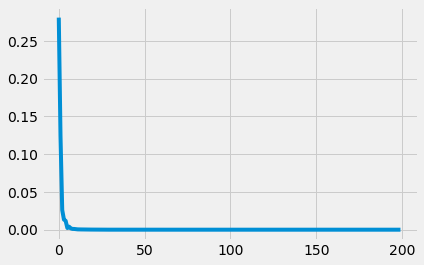

In [47]:
#Build the DL model
def model_fit(x_train,y_train):
  model_test = Sequential()
  model_test.add(Dense(50, activation="relu",input_dim=x_train.shape[1]))
  model_test.add(Dense(50))
  model_test.add(Dense(50))
  model_test.add(Dense(50))

  model_test.add(Dense(y_train.shape[1]))
  # Compile the model
  model_test.compile(optimizer='Adam', loss='mean_squared_error',metrics=['mape'])
  history = model_test.fit(x_train, y_train, batch_size=3, epochs=200, verbose=0)
  #scores = model_dll.evaluate(x_test, y_test, verbose=0)
  plt.plot(history.history['loss'])
  return model_test
model_test=model_fit(x_train,y_train)

In [51]:
def predict_value(model,scaler_x,scaler_y,input):
  input=[input]
  input=np.reshape(input,(1,1))
  input_scale=scaler_x.transform(input)
  predict = model.predict([input_scale])
  pre_nonscale=scaler_y.inverse_transform(predict)
  return pre_nonscale
predict=predict_value(model_test,scaler_x,scaler_y,0.2)

In [45]:
predict

array([[ 0.03369987, 20.008308  ,  6.6344886 ]], dtype=float32)